In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=3edc9e65f1ada7fa5e24b31363f0f29d5c047eb286b7129a4d2b4ca674e49a70
  Stored in directory: /Users/jlh/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import os

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("cumulative.csv")
# Drop the null columns where all values are null
df = df.drop(columns=["kepler_name"])


In [3]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()


In [4]:
df = df.drop(columns=["rowid", "kepid", "koi_pdisposition", "koi_score", "koi_tce_delivname"])

# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
#selected_features = df[['koi_disposition', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_steff', 'koi_slogg', 'koi_srad']]
#selected_features
X = df.drop(columns=["koi_disposition", "kepoi_name"], axis=1)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
y = df["koi_disposition"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
X_train.head()
y_train.head()

7556         CANDIDATE
2272         CANDIDATE
5020         CONFIRMED
7434    FALSE POSITIVE
5058         CANDIDATE
Name: koi_disposition, dtype: object

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
label_encoder.fit(y_test)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [10]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
hot_y_train = to_categorical(encoded_y_train)
hot_y_test = to_categorical(encoded_y_test)
hot_y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [11]:
from sklearn.preprocessing import StandardScaler

#Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [12]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.804
k: 3, Train/Test Score: 0.897/0.805
k: 5, Train/Test Score: 0.877/0.816
k: 7, Train/Test Score: 0.861/0.819
k: 9, Train/Test Score: 0.853/0.820
k: 11, Train/Test Score: 0.847/0.818
k: 13, Train/Test Score: 0.843/0.820
k: 15, Train/Test Score: 0.837/0.815
k: 17, Train/Test Score: 0.836/0.813
k: 19, Train/Test Score: 0.835/0.810
k: 21, Train/Test Score: 0.831/0.810
k: 23, Train/Test Score: 0.828/0.808
k: 25, Train/Test Score: 0.826/0.811
k: 27, Train/Test Score: 0.826/0.812
k: 29, Train/Test Score: 0.826/0.808
k: 31, Train/Test Score: 0.825/0.806
k: 33, Train/Test Score: 0.821/0.807
k: 35, Train/Test Score: 0.820/0.803
k: 37, Train/Test Score: 0.819/0.804
k: 39, Train/Test Score: 0.818/0.805


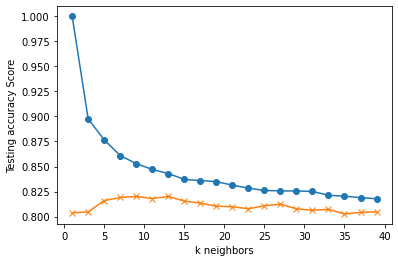

In [13]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, hot_y_train)
    train_score = knn.score(X_train_scaled, hot_y_train)
    test_score = knn.score(X_test_scaled, hot_y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [14]:
# Note that k: 15 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.825


In [15]:
KNN_model_default = KNeighborsClassifier()
KNN_model_default.fit(X_train_scaled, y_train)
y_pred_KNN_default = KNN_model_default.predict(X_test)
y_pred_KNN_default

array(['FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', ...,
       'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE'], dtype=object)

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [17]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,25))
weight_options = ["uniform", "distance"]
model = KNeighborsClassifier(n_neighbors=13)
param_grid = dict(n_neighbors = k_range, weights= weight_options)
grid = GridSearchCV(model, param_grid)

In [18]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=13),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24],
                         'weights': ['uniform', 'distance']})

In [19]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'n_neighbors': 10, 'weights': 'distance'}
0.8258721087243716
KNeighborsClassifier(n_neighbors=10, weights='distance')


In [20]:
predictions = grid.predict(X_test)
print("Test Acc: %3f" % grid.score(X_test_scaled, y_test))

Test Acc: 0.825218


In [21]:
# Create the GridSearchCV model
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['blue', 'red', 'green']))
#https://gist.github.com/sawansaurabh/3748a083ffdec38aacb8f43660a5f654

              precision    recall  f1-score   support

        blue       0.00      0.00      0.00       446
         red       0.00      0.00      0.00       572
       green       0.48      1.00      0.65       933

    accuracy                           0.48      1951
   macro avg       0.16      0.33      0.22      1951
weighted avg       0.23      0.48      0.31      1951



/Users/jlh/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Save the Model

In [23]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'knnModel(fail).sav'
joblib.dump(knn, filename)

['knnModel(fail).sav']